# A CNN-based based approach for OCR

In this project we present the method for letter recognition using Convolutional Neural Network.

It is inspired by this article ["Python Image Recognizer with Convolutional Neural Network"](http://www.codeastar.com/convolutional-neural-network-python/) .

For this project we use EMNIST dataset from ["the EMNIST dataset website"](http://www.codeastar.com/convolutional-neural-network-python/) .  

Emnist dataset is basically extended dataset contains black-and-white 28x28 pixel formated images of handwritten digits and letters. 

## Preprocessing 

* Set the path for data source

In [ ]:
path = '/home/irza/Projects/gzip/'

EMNIST dataset provides binary dataset, so it is still raw, therefore we need to convert it to comply the neural network input.

* Declare the function to convert data form binary to csv
  
  Source : ["MNIST in CSV"](https://pjreddie.com/projects/mnist-in-csv/) . 

In [ ]:
def convert(imgf, labelf, outf, n):
    f = open(imgf, "rb")
    o = open(outf, "w")
    l = open(labelf, "rb")

    f.read(16)
    l.read(8)
    images = []

    for i in range(n):
        image = [ord(l.read(1))]
        for j in range(28*28):
            image.append(ord(f.read(1)))
        images.append(image)

    for image in images:
        o.write(",".join(str(pix) for pix in image)+"\n")
        
    f.close()
    o.close()
    l.close()

* Convert the binary data to csv

  There are already emnist dataset for letters divided into training and test dataset.

  Here each data set is converted to csv and saved in file. 

In [ ]:
#training data
convert(path + "emnist-letters-train-images-idx3-ubyte", path + "emnist-letters-train-labels-idx1-ubyte",
        path + "letter_mnist_train.csv", 60000)

#test data
convert(path + "emnist-letters-test-images-idx3-ubyte", path + "emnist-letters-test-labels-idx1-ubyte",
        path + "letter_mnist_test.csv", 10000)

### Loading the prepared dataset

In [105]:
import numpy as np 
import pandas as pd 

df_train = pd.read_csv('/home/irza/Projects/gzip/letter_mnist_train.csv')
df_test = pd.read_csv('/home/irza/Projects/gzip/letter_mnist_test.csv')

### Overview of the csv data

here we can see the content of the training and test dataset loaded from csv file and shown as dataframe.

The first column contains the label of the image in number and the rest of the columns contain the pixel values.

In [14]:
df_train.shape

(59999, 785)

In [2]:
df_train.head()

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_test.shape

(9999, 785)

In [3]:
df_test.head()

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* separate the label column from the pixel columns 
  
  Variable name ends with x contains the pixel values.
  
  Variable name ends with y contains the label.

In [4]:
df_train_x = df_train.iloc[:,1:] 
df_train_y = df_train.iloc[:,:1] 

df_test_x = df_test.iloc[:,1:] 
df_test_y = df_test.iloc[:,:1] 

### Overview of the images

* plot some of images from training dataset

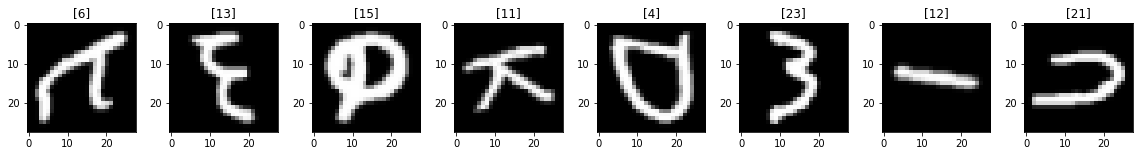

In [94]:
import matplotlib.pyplot as plt

ax = plt.subplots(1,8, figsize=(20,2))
for i in range(0,8):
    j = i+50
    ax[1][i].imshow(df_train_x.values[j].reshape(28,28), cmap='gray')
    ax[1][i].set_title(df_train_y.values[j])

* plot an image for each classs from training dataset

In [26]:
unique_class = np.unique(df_train_y.iloc[:,0].values)

* plot one image for each class

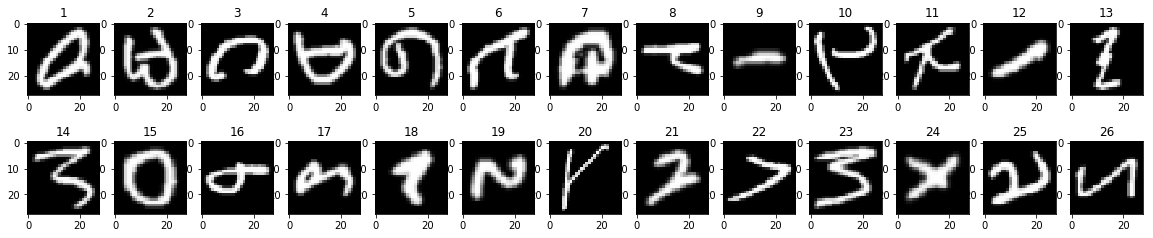

In [93]:
fig, axes = plt.subplots(2,int(len(unique_class)/2), figsize=(20,4))

for i in np.nditer(unique_class):
    pixel_val = df_train.loc[df_train_y.iloc[:,0] == i].iloc[:,1:].head(1).values.reshape(28,28)
    
    row_plot = 0
    col_plot = (i-1) % 13
    
    if i > len(unique_class)/2:
        row_plot = 1
    
    axes[row_plot][col_plot].imshow(pixel_val, cmap='gray')
    axes[row_plot][col_plot].set_title(i)

* plot n image for each class

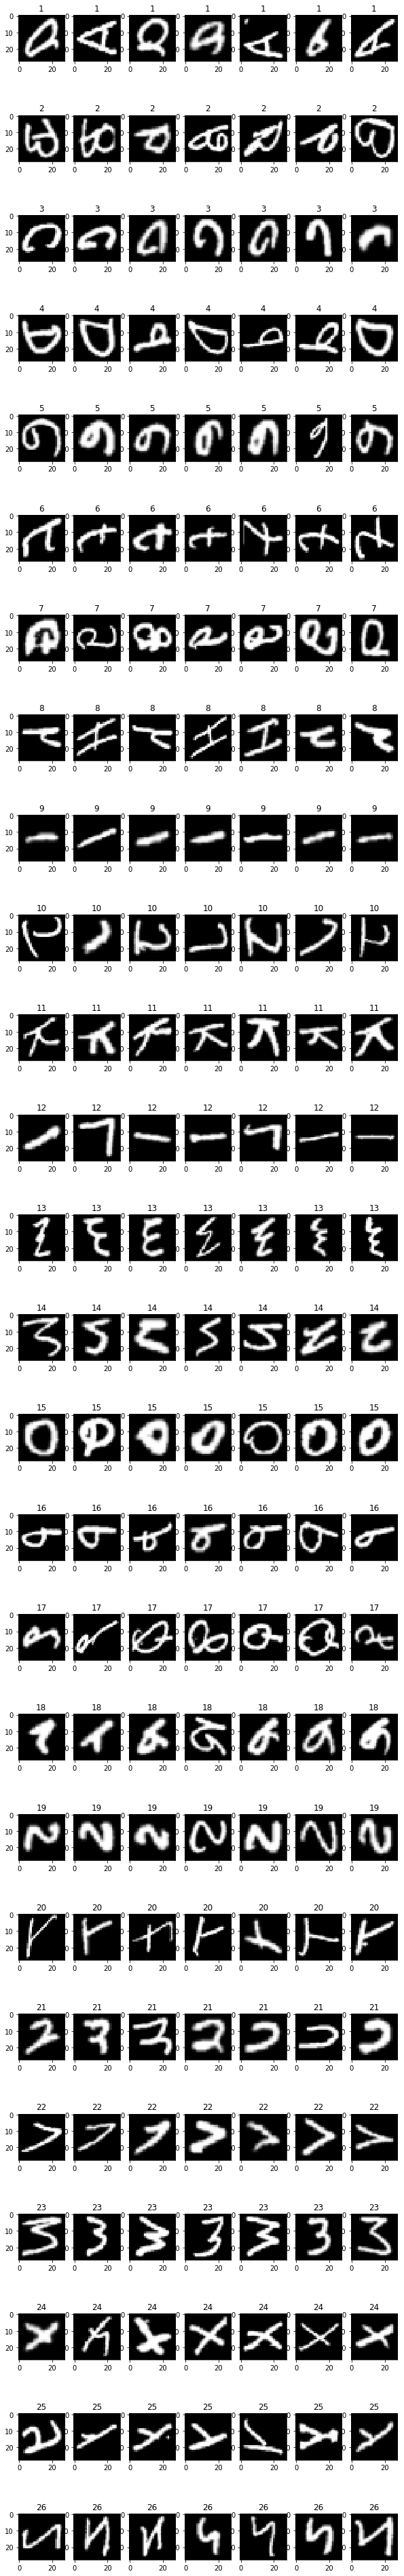

In [104]:
num_sample = 7

fig, axes = plt.subplots(len(unique_class),num_sample, figsize=(10,70))

for i in np.nditer(unique_class):
    pixel_val_arr = df_train.loc[df_train_y.iloc[:,0] == i].iloc[:,1:].head(num_sample).values
    
    for j in range(0,num_sample):
        pixel_val = pixel_val_arr[j].reshape(28,28)
        axes[i-1][j].imshow(pixel_val, cmap='gray')
        axes[i-1][j].set_title(i)

In [ ]:
#normalize 255 grey scale to values between 0 and 1 
df_test_x = df_test_x / 255
df_train_x = df_train_x / 255

In [ ]:
#reshape training X and text x to (number, height, width, channels)
arr_train_x_28x28 = np.reshape(df_train_x.values, (df_train_x.values.shape[0], 28, 28, 1))
arr_test_x_28x28 = np.reshape(df_test_x.values, (df_test_x.values.shape[0], 28, 28, 1))

# Loading the packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.models import model_from_json

# Building model

In [ ]:
def cnn_model(result_class_size):
    
    model = Sequential()
    
    #use Conv2D to create our first convolutional layer, with 32 filters, 5x5 filter size, 
    #input_shape = input image with (height, width, channels), activate ReLU to turn negative to zero
    model.add(Conv2D(32, (5, 5), input_shape=(28,28,1), activation='relu'))
    
    #add a pooling layer for down sampling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # add another conv layer with 16 filters, 3x3 filter size, 
    model.add(Conv2D(16, (3, 3), activation='relu'))
    
    #set 20% of the layer's activation to zero, to void overfit
    model.add(Dropout(0.2))
    
    #convert a 2D matrix in a vector
    model.add(Flatten())
    
    #add fully-connected layers, and ReLU activation
    model.add(Dense(130, activation='relu'))
    model.add(Dense(50, activation='relu'))
    
    #add a fully-connected layer with softmax function to squash values to 0...1 
    model.add(Dense(result_class_size, activation='softmax'))   
    model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
    
    return model

In [ ]:
#turn the label to 42000 binary class matrix 
arr_train_y = np_utils.to_categorical(df_train_y.iloc[:,0].values)
model = cnn_model(arr_train_y.shape[1])
model.summary()

In [ ]:
#normalize 255 grey scale to values between 0 and 1 
df_test_x = df_test_x / 255
df_train_x = df_train_x / 255

In [ ]:
#reshape training X and text x to (number, height, width, channels)
arr_train_x_28x28 = np.reshape(df_train_x.values, (df_train_x.values.shape[0], 28, 28, 1))
arr_test_x_28x28 = np.reshape(df_test_x.values, (df_test_x.values.shape[0], 28, 28, 1))

In [ ]:
#spliting into train and validation 
#validate size = 8%
random_seed = 3
split_train_x, split_val_x, split_train_y, split_val_y, = train_test_split(arr_train_x_28x28, arr_train_y, test_size = 0.08, random_state=random_seed)

# Unclear step, it supposed to be training part !!!

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_acc',factor=0.5,patience=3,min_lr=0.00001)

datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range 
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1  # randomly shift images vertically
        )

datagen.fit(split_train_x)

model.fit_generator(datagen.flow(split_train_x,split_train_y, batch_size=64),
                              epochs = 10, validation_data = (split_val_x,split_val_y),
                              verbose = 2, steps_per_epoch=700 
                              , callbacks=[reduce_lr])


# Predicting test data

In [ ]:
prediction = model.predict_classes(arr_test_x_28x28, verbose=0)
data_to_submit = pd.DataFrame({"ImageId": list(range(1,len(prediction)+1)), "Label": prediction})
data_to_submit.to_csv(path + "result.csv", header=True, index = False)

# Show prediction result

In [ ]:
from random import randrange

#pick 10 images from testing data set
start_idx = randrange(df_test_x.shape[0]-10) 


fig, ax = plt.subplots(2,5, figsize=(15,8))
for j in range(0,2): 
  for i in range(0,5):
     ax[j][i].imshow(df_test_x.values[start_idx].reshape(28,28), cmap='gray')
     ax[j][i].set_title("Index:{} \nPrediction:{}".format(start_idx, prediction[start_idx]))
     start_idx +=1

# Confusion matrix for evaluation

In [ ]:
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
     
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(df_test_y,data_to_submit.iloc[:,1] )
np.savetxt("cm.csv",conf,delimiter=",",fmt="%10i")
#calculated accuracy from cm
np.round(np.trace(conf) / len(df_test_y),5)


# Save and load weights to JSON-file

In [ ]:
####source: https://machinelearningmastery.com/save-load-keras-deep-learning-models/


#serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
#serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(split_train_x, split_train_y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
